# Color space

In [226]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from os import listdir, path
import random
%matplotlib inline

pathGray  = "ima/gray"
pathColor = "ima/color"

FilesGray  =  listdir(pathGray)
FilesColor = listdir(pathColor)

grayKeys   = []
colorKeys  = []

files = {
    "gray" :{ },
    "color":{ }
}

for i in FilesGray:
    key = i.split(".")[0]
    if key != "":
        grayKeys.append(key)
        files["gray"][key] = cv2.imread(pathGray + "/" + i, cv2.IMREAD_GRAYSCALE)

for i in FilesColor:
    key = i.split(".")[0]
    if key != "":
        colorKeys.append(key)
        temp = cv2.imread(pathColor + "/" + i, cv2.IMREAD_COLOR)
        files["color"][key] = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
    
def fRGB2HSIt(img,flag):   #Funcion para pasar de RGB a HSI
    height,widht,_= img.shape        #se obtienen las dimensiones de la imagen
    
    H=np.zeros((height,widht))       #se crea una matriz de ceros con las dimensiones de la imagen para la matiz
    S=np.zeros((height,widht))       #se crea una matriz de ceros con las dimensiones de la imagen para la saturacion
    I=np.zeros((height,widht))       #se crea una matriz de ceros con las dimensiones de la imagen para la intensidad
    
    nImg = img.copy()
    nImg = nImg/255
    
    R,G,B = cv2.split(nImg)
    
    
    pt = (R-G) + (R-B)
    pb = 1e-30 + 2*((    ((R-G)**2)    +    ((R-B)*(G-B))    )**0.5) 

    mask1 = np.uint16(B>G)
    mask2 = np.uint16(B<=G)
    
    H = np.rad2deg(np.arccos(( pt/pb ))) 
    H = ((360-H)*mask1) + H*mask2
    
    H = H/360
    
    
    I = (1/3)*(1e-30+R+G+B)
   
    S = 1 - ( ( (np.minimum(R,G,B)) ) / (I) )
    
    H = H*255
    H = np.uint8(H)
    
    I = I*255
    I = np.uint8(I)
    
    S = S*255
    S = np.uint8(S)
    
    HSI = cv2.merge([H,S,I])

    if flag == 0:
        return cv2.split(HSI)
    else:
        return HSI

    
    

def HSI2RGB(img_hsi, flag):   
    
    
    H,S,I = cv2.split(img_hsi)
    H = (H/255.0)*360.0
    S = S/255.0
    I = I/255.0

    R=np.zeros(H.shape)
    G=np.zeros(H.shape)
    B=np.zeros(H.shape)
    
    hMask1 = np.uint8( (H>=  0)&(H<120) )
    hMask2 = np.uint8( (H>=120)&(H<240) )
    hMask3 = np.uint8(  H>= 240 )
    
    
    B =     (I*(1-S))*hMask1
    R =     (I*(1+((S*(np.cos(np.deg2rad(H    ))))/((np.cos(np.deg2rad(60- H     )))))))*hMask1
    G =     ( 3*(I - ((R+B)/3) ))*hMask1
    
    
    R = R + (I*(1-S))*hMask2
    G = G + (I*(1+((S*(np.cos(np.deg2rad(H-120))))/((np.cos(np.deg2rad(60-(H-120))))))))*hMask2
    B = B + ( 3*(I - ((R+G)/3) ))*hMask2
    
    G = G + (I*(1-S))*hMask3
    B = B + (I*(1+((S*(np.cos(np.deg2rad(H-240))))/((np.cos(np.deg2rad(60-(H-240))))))))*hMask3
    R = R + ( 3*(I-((B+G)/3)) )*hMask3
    
    
    res = cv2.merge([R,G,B])*100
    res = np.trunc(res)
    res = (res/100)*255
    res = np.uint8(res)
    if flag == 0:
        return cv2.split(res)
    else:
        return res
    
    
print(grayKeys)
print(colorKeys)



temp = None
FilesGray  = None
FilesColor = None

['flower', 'chessboard', 'crosses', 'building', 'small_blobs', 'steve_blog', 'noisy_fingerprint', 'spheres', 'moon', 'cameraman', 'fingerprint', 'sudoku']
['mms', 'connected', 'monkey']


RGB
[[[255 255   0]
  [255 255   0]
  [255 255   0]]

 [[255 255   0]
  [255 255   0]
  [255 255   0]]

 [[255 255   0]
  [255 255   0]
  [255 255   0]]]


HSI
[[[ 42 129 170]
  [ 42 129 170]
  [ 42 129 170]]

 [[ 42 129 170]
  [ 42 129 170]
  [ 42 129 170]]

 [[ 42 129 170]
  [ 42 129 170]
  [ 42 129 170]]]


RGB
[[[211 211  81]
  [211 211  81]
  [211 211  81]]

 [[211 211  81]
  [211 211  81]
  [211 211  81]]

 [[211 211  81]
  [211 211  81]
  [211 211  81]]]


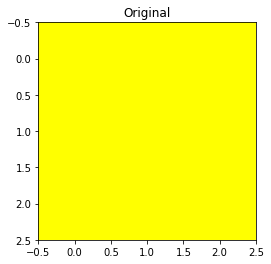

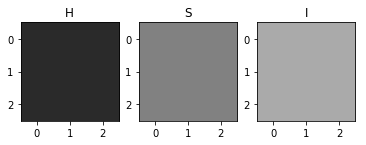

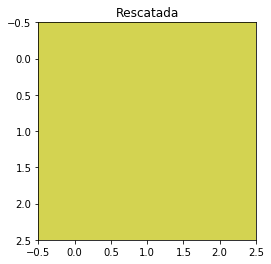

In [230]:
r = np.full((3,3,3),[255,255,0],dtype=np.uint8)
g = np.full((3,3,3),[0,100,0],dtype=np.uint8)
b = np.full((3,3,3),[0,0,100],dtype=np.uint8)

img = r.copy()

H,S,I = fRGB2HSIt(img,0)
HSI   = fRGB2HSIt(img,1)
RGB   = HSI2RGB(HSI,1)

print("RGB")
print(img)
print("\n")
print("HSI")
print(HSI)
print("\n")
print("RGB")
print(RGB)

plt.imshow(img)
plt.title("Original")
plt.show()


plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(H,cv2.COLOR_GRAY2RGB))
plt.title("H")

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(S,cv2.COLOR_GRAY2RGB))
plt.title("S")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(I,cv2.COLOR_GRAY2RGB))
plt.title("I")

plt.show()

plt.imshow(RGB)
plt.title("Rescatada")
plt.show()



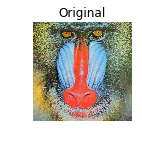

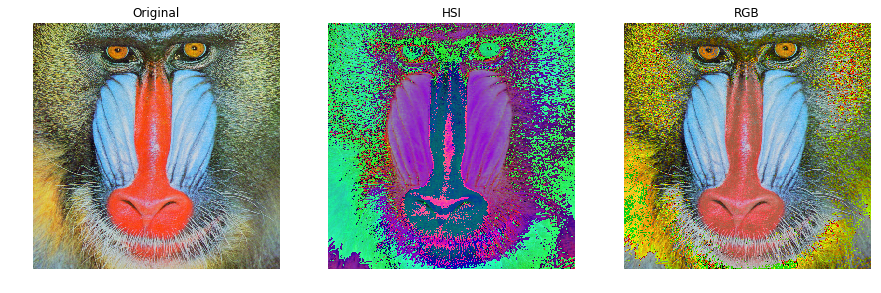

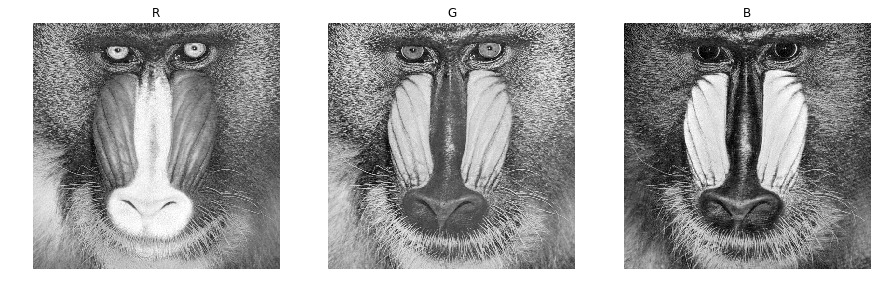

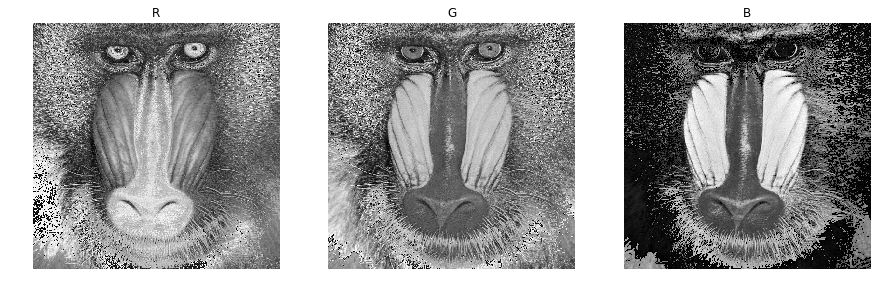

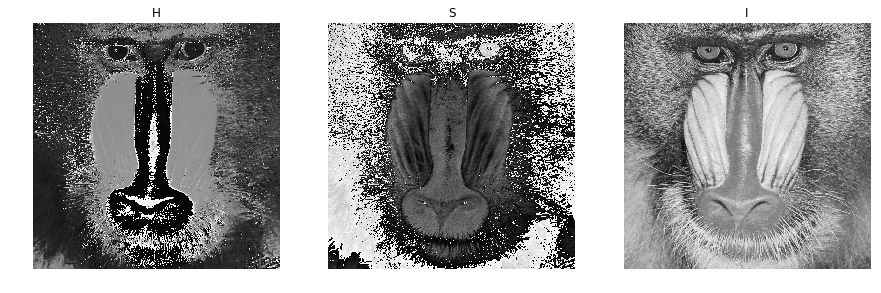

In [228]:
size = 15

img = files["color"]["monkey"]
Ro, Go, Bo = cv2.split(img)

img_hsi = fRGB2HSIt(img,1)
H,S,I   = fRGB2HSIt(img,0)

img_rgb = HSI2RGB(img_hsi,1)
R,G,B   = HSI2RGB(img_hsi,0)

plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")
plt.show()

plt.figure(figsize=(size,size)) 
plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img_hsi)
plt.title("HSI")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img_rgb)
plt.title("RGB")
plt.axis("off")

plt.show()


plt.figure(figsize=(size,size)) 

plt.subplot(1,3,1)
plt.imshow(Ro, cmap="gray")
plt.title("R")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(Go, cmap="gray")
plt.title("G")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(Bo, cmap="gray")
plt.title("B")
plt.axis("off")

plt.show()



plt.figure(figsize=(size,size)) 
plt.subplot(1,3,1)
plt.imshow(R, cmap="gray")
plt.title("R")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(G, cmap="gray")
plt.title("G")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(B, cmap="gray")
plt.title("B")
plt.axis("off")

plt.show()





plt.figure(figsize=(size,size)) 

plt.subplot(1,3,1)
plt.imshow(H, cmap="gray")
plt.title("H")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(S, cmap="gray")
plt.title("S")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(I, cmap="gray")
plt.title("I")
plt.axis("off")

plt.show()







# 